PARTE 1: Variando C (penalización de errores)
C=  0.01 → Train Acc: 0.850 | Status: 🔵 UNDERFITTING
C=  0.10 → Train Acc: 0.885 | Status: 🔵 UNDERFITTING
C=  1.00 → Train Acc: 0.960 | Status: 🟢 ADECUADO
C= 10.00 → Train Acc: 0.970 | Status: 🟢 ADECUADO
C=100.00 → Train Acc: 0.975 | Status: 🔴 OVERFITTING
C=1000.00 → Train Acc: 0.990 | Status: 🔴 OVERFITTING


/var/folders/73/x2hlwfwj5b3_2np7fjhq813w0000gn/T/ipykernel_6263/1672213901.py:66: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/73/x2hlwfwj5b3_2np7fjhq813w0000gn/T/ipykernel_6263/1672213901.py:66: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/73/x2hlwfwj5b3_2np7fjhq813w0000gn/T/ipykernel_6263/1672213901.py:66: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/rafaelguevara/Documents/Diplomado ciencia datos e inteligencia artificial/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/rafaelguevara/Documents/Diplomado ciencia datos e inteligencia artificial/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyp

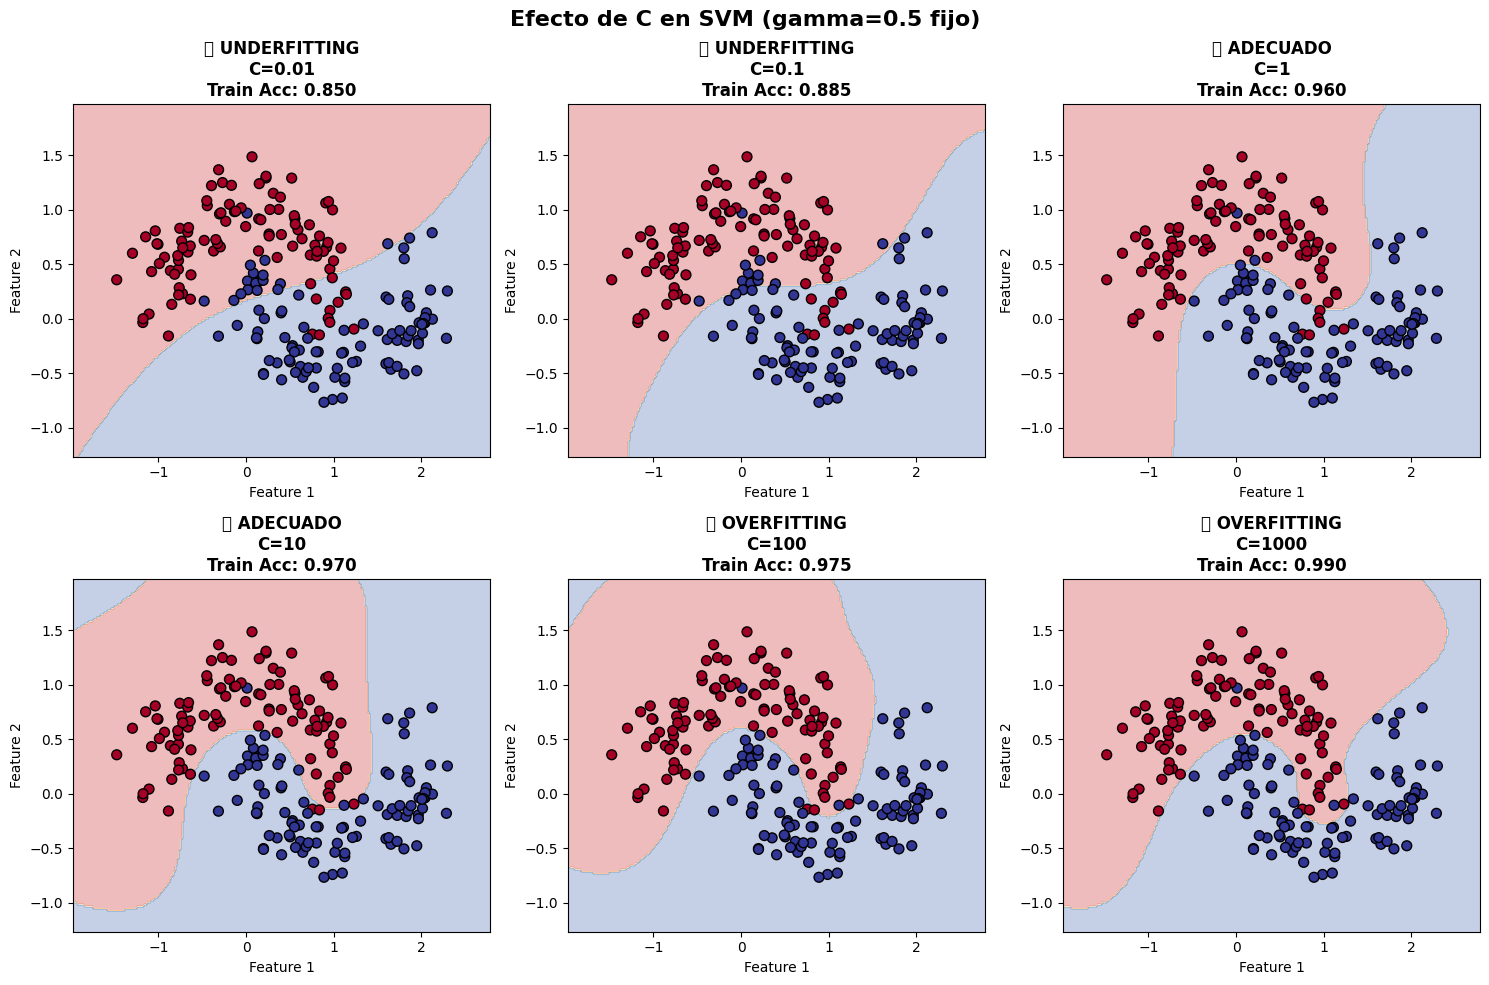


PARTE 2: Variando gamma (influencia de cada punto)
gamma= 0.01 → Train Acc: 0.845 | Status: 🔵 UNDERFITTING
gamma= 0.10 → Train Acc: 0.850 | Status: 🔵 UNDERFITTING
gamma= 0.50 → Train Acc: 0.960 | Status: 🟢 ADECUADO
gamma= 1.00 → Train Acc: 0.975 | Status: 🟢 ADECUADO
gamma= 5.00 → Train Acc: 0.975 | Status: 🔴 OVERFITTING
gamma=10.00 → Train Acc: 0.985 | Status: 🔴 OVERFITTING


/var/folders/73/x2hlwfwj5b3_2np7fjhq813w0000gn/T/ipykernel_6263/1672213901.py:105: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/73/x2hlwfwj5b3_2np7fjhq813w0000gn/T/ipykernel_6263/1672213901.py:105: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/73/x2hlwfwj5b3_2np7fjhq813w0000gn/T/ipykernel_6263/1672213901.py:105: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/rafaelguevara/Documents/Diplomado ciencia datos e inteligencia artificial/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/rafaelguevara/Documents/Diplomado ciencia datos e inteligencia artificial/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: G

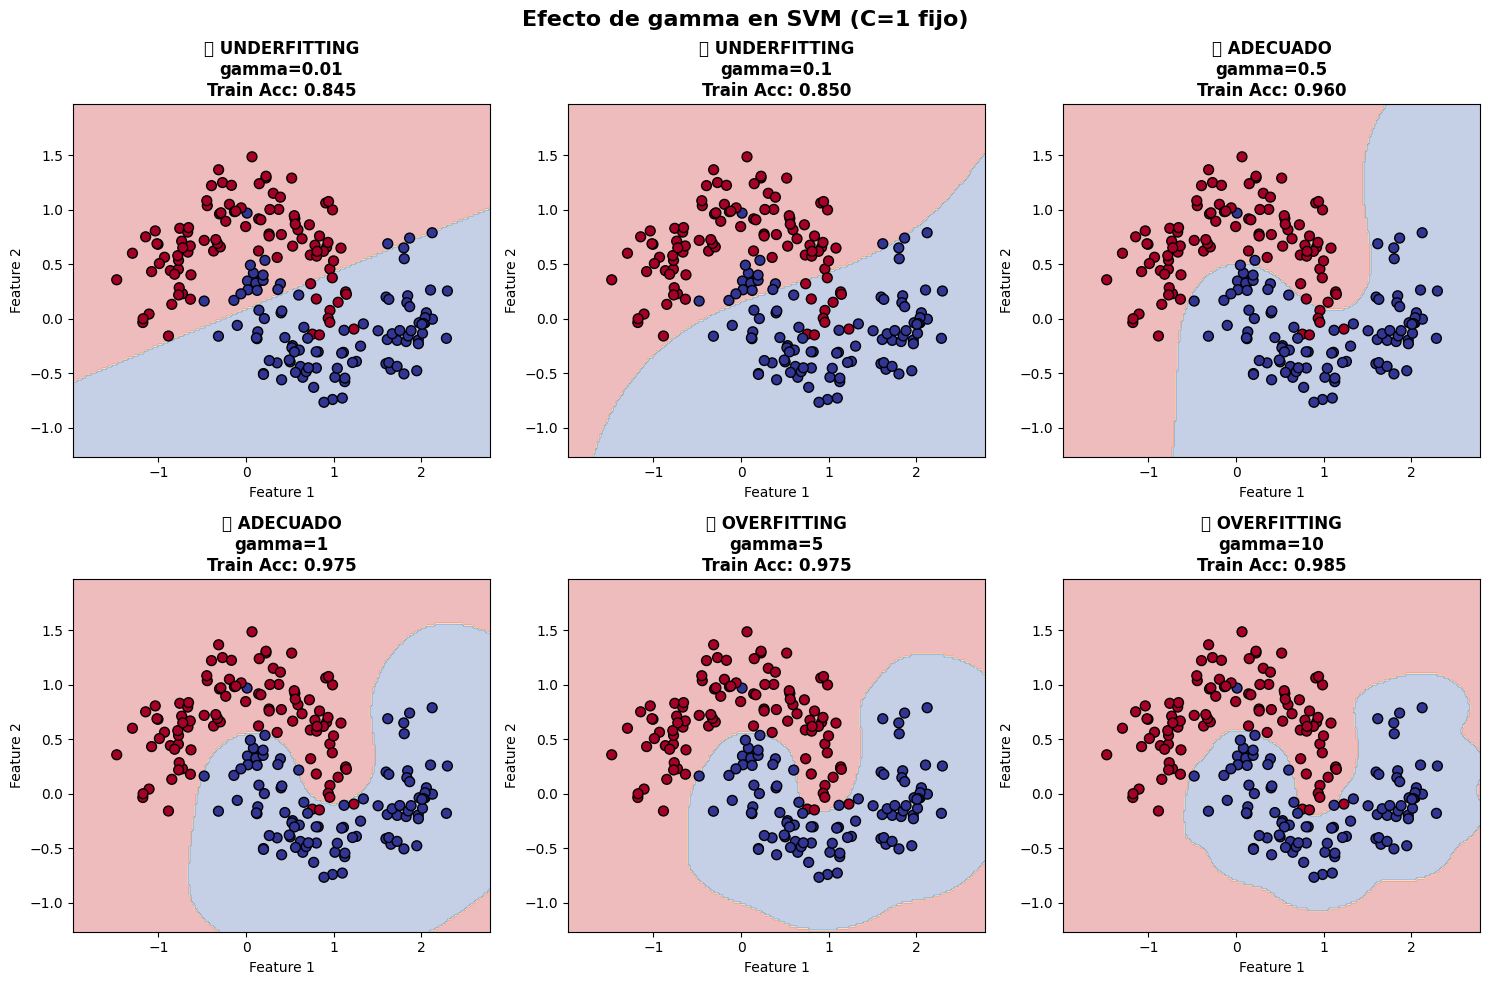


PARTE 3: Learning Curves - Comparación
UNDERFITTING (C=0.1, γ=0.1)
  Train final: 0.855
  CV final:    0.850
  Gap:         0.005

ADECUADO (C=1, γ=0.5)
  Train final: 0.953
  CV final:    0.955
  Gap:         -0.003

OVERFITTING (C=100, γ=5)
  Train final: 0.997
  CV final:    0.940
  Gap:         0.058



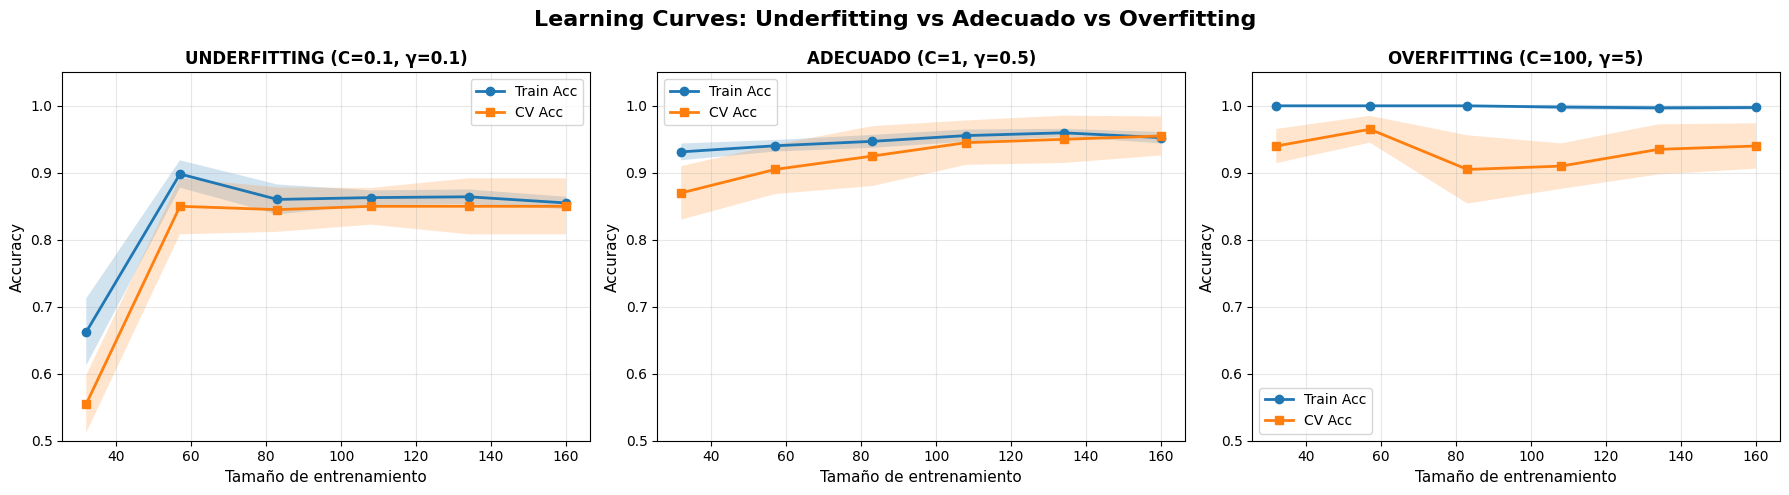


RESUMEN DE PARÁMETROS:

📊 Parámetro C (penalización de errores):
   • C bajo (0.01-0.1):  Permite muchos errores → frontera suave → UNDERFITTING
   • C medio (1-10):     Balance adecuado → buen ajuste
   • C alto (100-1000):  Penaliza errores → frontera compleja → OVERFITTING

📊 Parámetro gamma (influencia de cada punto):
   • gamma bajo (0.01-0.1): Influencia amplia → frontera suave → UNDERFITTING
   • gamma medio (0.5-1):   Influencia moderada → buen ajuste
   • gamma alto (5-10):     Influencia local → memoriza puntos → OVERFITTING

🎯 Cómo identificar cada caso:
   • UNDERFITTING:  Train y CV bajos, curvas convergentes cerca
   • ADECUADO:      Train y CV altos y cercanos (~0.05 gap)
   • OVERFITTING:   Train muy alto, CV bajo, gran brecha (>0.15 gap)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Generar datos con ruido (luna creciente - problema no lineal)
np.random.seed(42)
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Función para graficar la frontera de decisión
def plot_decision_boundary(model, X, y, title, ax):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolors='k', s=50)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# ============================================
# PARTE 1: Efecto de C (con gamma fijo)
# ============================================
print("=" * 60)
print("PARTE 1: Variando C (penalización de errores)")
print("=" * 60)

fig1, axes1 = plt.subplots(2, 3, figsize=(15, 10))
fig1.suptitle('Efecto de C en SVM (gamma=0.5 fijo)', fontsize=16, fontweight='bold')

C_values = [0.01, 0.1, 1, 10, 100, 1000]
gamma_fixed = 0.5

for idx, C in enumerate(C_values):
    ax = axes1[idx // 3, idx % 3]
    
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='rbf', C=C, gamma=gamma_fixed, random_state=42))
    ])
    model.fit(X, y)
    
    train_score = model.score(X, y)
    
    if C <= 0.1:
        status = "🔵 UNDERFITTING"
    elif C <= 10:
        status = "🟢 ADECUADO"
    else:
        status = "🔴 OVERFITTING"
    
    title = f'{status}\nC={C}\nTrain Acc: {train_score:.3f}'
    plot_decision_boundary(model, X, y, title, ax)
    
    print(f"C={C:6.2f} → Train Acc: {train_score:.3f} | Status: {status}")

plt.tight_layout()
plt.show()

# ============================================
# PARTE 2: Efecto de gamma (con C fijo)
# ============================================
print("\n" + "=" * 60)
print("PARTE 2: Variando gamma (influencia de cada punto)")
print("=" * 60)

fig2, axes2 = plt.subplots(2, 3, figsize=(15, 10))
fig2.suptitle('Efecto de gamma en SVM (C=1 fijo)', fontsize=16, fontweight='bold')

gamma_values = [0.01, 0.1, 0.5, 1, 5, 10]
C_fixed = 1

for idx, gamma in enumerate(gamma_values):
    ax = axes2[idx // 3, idx % 3]
    
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='rbf', C=C_fixed, gamma=gamma, random_state=42))
    ])
    model.fit(X, y)
    
    train_score = model.score(X, y)
    
    if gamma <= 0.1:
        status = "🔵 UNDERFITTING"
    elif gamma <= 1:
        status = "🟢 ADECUADO"
    else:
        status = "🔴 OVERFITTING"
    
    title = f'{status}\ngamma={gamma}\nTrain Acc: {train_score:.3f}'
    plot_decision_boundary(model, X, y, title, ax)
    
    print(f"gamma={gamma:5.2f} → Train Acc: {train_score:.3f} | Status: {status}")

plt.tight_layout()
plt.show()

# ============================================
# PARTE 3: Learning Curves para 3 configuraciones
# ============================================
print("\n" + "=" * 60)
print("PARTE 3: Learning Curves - Comparación")
print("=" * 60)

configs = [
    {'C': 0.1, 'gamma': 0.1, 'label': 'UNDERFITTING (C=0.1, γ=0.1)', 'color': 'blue'},
    {'C': 1, 'gamma': 0.5, 'label': 'ADECUADO (C=1, γ=0.5)', 'color': 'green'},
    {'C': 100, 'gamma': 5, 'label': 'OVERFITTING (C=100, γ=5)', 'color': 'red'}
]

fig3, axes3 = plt.subplots(1, 3, figsize=(18, 5))
fig3.suptitle('Learning Curves: Underfitting vs Adecuado vs Overfitting', 
              fontsize=16, fontweight='bold')

for idx, config in enumerate(configs):
    ax = axes3[idx]
    
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='rbf', C=config['C'], gamma=config['gamma'], random_state=42))
    ])
    
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, train_sizes=np.linspace(0.2, 1.0, 6),
        scoring='accuracy', n_jobs=-1, random_state=42
    )
    
    train_mean = train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    val_mean = val_scores.mean(axis=1)
    val_std = val_scores.std(axis=1)
    
    ax.plot(train_sizes, train_mean, 'o-', label='Train Acc', linewidth=2)
    ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
    
    ax.plot(train_sizes, val_mean, 's-', label='CV Acc', linewidth=2)
    ax.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)
    
    ax.set_xlabel('Tamaño de entrenamiento', fontsize=11)
    ax.set_ylabel('Accuracy', fontsize=11)
    ax.set_title(config['label'], fontsize=12, fontweight='bold')
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)
    ax.set_ylim([0.5, 1.05])
    
    gap = train_mean[-1] - val_mean[-1]
    print(f"{config['label']}")
    print(f"  Train final: {train_mean[-1]:.3f}")
    print(f"  CV final:    {val_mean[-1]:.3f}")
    print(f"  Gap:         {gap:.3f}\n")

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("RESUMEN DE PARÁMETROS:")
print("=" * 60)
print("""
📊 Parámetro C (penalización de errores):
   • C bajo (0.01-0.1):  Permite muchos errores → frontera suave → UNDERFITTING
   • C medio (1-10):     Balance adecuado → buen ajuste
   • C alto (100-1000):  Penaliza errores → frontera compleja → OVERFITTING

📊 Parámetro gamma (influencia de cada punto):
   • gamma bajo (0.01-0.1): Influencia amplia → frontera suave → UNDERFITTING
   • gamma medio (0.5-1):   Influencia moderada → buen ajuste
   • gamma alto (5-10):     Influencia local → memoriza puntos → OVERFITTING

🎯 Cómo identificar cada caso:
   • UNDERFITTING:  Train y CV bajos, curvas convergentes cerca
   • ADECUADO:      Train y CV altos y cercanos (~0.05 gap)
   • OVERFITTING:   Train muy alto, CV bajo, gran brecha (>0.15 gap)
""")